In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cross-Validation and GridSearchCV with Scikit-learn


In this notebook, we will cover:

- What is Cross-Validation?
- Why is it needed in classification?
- k-Fold Cross-Validation explained
- Using `cross_val_score` for classification
- What is GridSearchCV?
- How to use GridSearchCV with Logistic Regression and Decision Tree Classifier

We'll use the **Breast Cancer Wisconsin Dataset** for classification tasks.

## Load and Inspect Dataset

We'll load the Breast Cancer dataset and convert it into a pandas DataFrame.

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Cancer')  # 0 = malignant, 1 = benign

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train-Test Split
We'll perform an 80/20 split and train a **Logistic Regression** model to establish a baseline.

In [ ]:
# Code Cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lr = LogisticRegression(max_iter=10000, solver='liblinear')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Cross-Validation in Classification

Cross-validation splits the data into multiple training/validation sets to evaluate model performance more reliably than a single split.

## k-Fold Cross-Validation (k=5):

- Split data into 5 equal parts (folds)
- Train on 4 folds, validate on 1
- Repeat for all folds and average the performance

## Logistic Regression: 5-Fold Cross-Validation using Accuracy

In [ ]:
cv_scores = cross_val_score(LogisticRegression(max_iter=10000, solver='liblinear'), X, y, cv=5, scoring='accuracy')

print("Fold-wise Accuracy Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))

Fold-wise Accuracy Scores: [0.92982456 0.93859649 0.97368421 0.94736842 0.96460177]
Average Accuracy: 0.9508150908244062


## Decision Tree Classifier: 5-Fold Cross-Validation using Accuracy

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
cv_scores_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

print("Fold-wise Accuracy Scores (DT):", cv_scores_dt)
print("Average Accuracy (DT):", np.mean(cv_scores_dt))

Fold-wise Accuracy Scores (DT): [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
Average Accuracy (DT): 0.9173420276354604


# GridSearchCV for Hyperparameter Tuning


## Understanding the Complete GridSearchCV Process

`GridSearchCV` is a powerful model selection tool provided by `sklearn` to help find the **best hyperparameters** for a given model using **cross-validation**.

Here is how the entire process works:

---

### Step-by-Step Working of GridSearchCV

1. **Define the Model**  
   You start by choosing an estimator (e.g., `DecisionTreeClassifier`, `LogisticRegression`, etc.).

2. **Create a Parameter Grid**  
   You specify a dictionary of hyperparameters to test.  
   Example:
   ```python
   param_grid = {
       'max_depth': [3, 5, 10],
       'criterion': ['gini', 'entropy']
   }
   ```

3. **Initialize GridSearchCV**  
   You pass the estimator and parameter grid to `GridSearchCV`, and define:
   - `cv`: Number of folds in cross-validation
   - `scoring`: Evaluation metric (e.g., `'accuracy'`, `'f1'`, `'neg_mean_squared_error'`)
   - `n_jobs=-1`: Use all available CPU cores for faster computation

   Example:
   ```python
   grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
   ```

4. **Fit on Training Data**  
   When you call `grid.fit(X_train, y_train)`, GridSearchCV:
   - Iterates through **all combinations** of hyperparameters
   - For **each combination**:
     - Performs **k-fold cross-validation** (e.g., 5-fold)
     - Calculates the **average performance score**
   - Keeps track of the **best-performing hyperparameter combination**

5. **Retrieve Best Model & Parameters**  
   After fitting:
   - `grid.best_params_` → Shows the best hyperparameters found
   - `grid.best_score_` → Shows the best cross-validated score
   - `grid.best_estimator_` → Returns the final model trained with the best parameters on the **entire training set**

---

### Why Use GridSearchCV?

- Avoids manual trial-and-error of hyperparameters.
- Ensures fair evaluation using cross-validation.
- Helps find a model that **generalizes better** to unseen data.
- Works with **any estimator** in `sklearn`.

---

### Summary of Key Attributes

| Attribute | Description |
|-----------|-------------|
| `best_params_` | Dictionary of the best hyperparameter combination |
| `best_score_`  | Best cross-validation score achieved |
| `best_estimator_` | Trained model with best hyperparameters |
| `cv_results_` | Full history of all parameter combinations and their scores |

---

GridSearchCV is especially useful in combination with **pipelines**, **scaling**, and **preprocessing**, and it can be used for both **classification** and **regression** problems.


GridSearchCV allows us to find the best combination of hyperparameters through exhaustive search.

We'll use it to tune:
- Decision Tree Classifier (`max_depth`, `min_samples_split`, `criterion`)

## Decision Tree Grid Search (Explanation)



We’ll search over:
- `max_depth`: How deep the tree can go
- `min_samples_split`: Minimum samples to split a node
- `criterion`: Splitting strategy ('gini', 'entropy')

### 1. What is `param_grid_dt`?

This dictionary defines the hyperparameters and their values to be explored during grid search:

- `'max_depth'`: Maximum depth of the tree.
    - `[3, 5, 10, None]`: Tests shallow, medium, deep, and unlimited depth trees.
- `'min_samples_split'`: Minimum samples required to split an internal node.
    - `[2, 5, 10]`: Larger values make trees less complex.
- `'criterion'`: Function used to measure the quality of a split.
    - `['gini', 'entropy']`: Two standard methods — Gini Impurity and Entropy (Information Gain).

This creates **4 × 3 × 2 = 24 different combinations** to try.

---

### 2. What does `GridSearchCV(...)` do?

- `DecisionTreeClassifier(random_state=42)`: The base estimator we want to tune.
- `param_grid=param_grid_dt`: The hyperparameter space to search.
- `cv=5`: Perform **5-fold Cross-Validation**:
    - For each parameter combination, the model is trained/validated across 5 different splits of the training data.
- `scoring='accuracy'`: Uses **classification accuracy** to score performance.
- `n_jobs=-1`: Use **all CPU cores** to parallelize computation.

This means the model will be trained **24 × 5 = 120 times** during the search.

---

### 3. What happens during `grid_dt.fit(X_train, y_train)`?

When `.fit()` is called:

1. GridSearch tries all 24 combinations of parameters.
2. For each combination:
    - It performs **5-fold cross-validation**.
    - Calculates the **average accuracy** across the 5 folds.
3. Tracks the combination with the highest average accuracy.

---

### 4. What do `best_params_` and `best_score_` show?

- `grid_dt.best_params_`:
    - Returns the **best hyperparameter combination** found during search.
- `grid_dt.best_score_`:
    - The **highest average accuracy** achieved across 5-folds using those best parameters.

---

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Parameters (DT):", grid_dt.best_params_)
print("Best CV Accuracy (DT):", grid_dt.best_score_)

Best Parameters (DT): {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best CV Accuracy (DT): 0.9384615384615385


## Decision Tree (Best) Test Performance

In [ ]:
best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)

print("\nBest Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Best Decision Tree Test Accuracy: 0.9210526315789473
[[39  3]
 [ 6 66]]


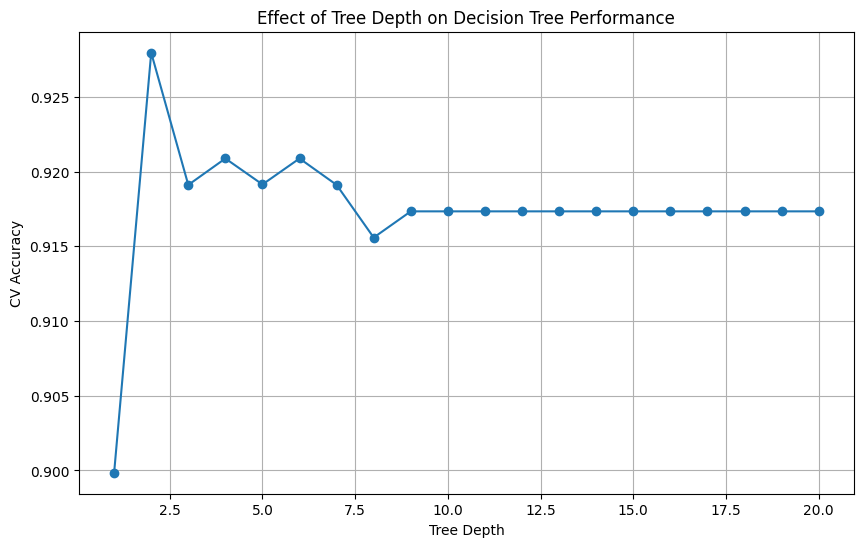

In [ ]:
depths = range(1, 21)
accuracy_scores = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("CV Accuracy")
plt.title("Effect of Tree Depth on Decision Tree Performance")
plt.grid(True)
plt.show()

- Cross-validation provides reliable estimates of model generalization.
- `cross_val_score` is simple for quick evaluations.
- `GridSearchCV` helps find the best hyperparameters through exhaustive search.
- Logistic Regression and Decision Trees are both interpretable, effective classifiers.
- We used the Breast Cancer dataset to demonstrate these techniques.
